<a href="https://colab.research.google.com/github/ThivyaTS/cnc-colab-data-versioning/blob/main/train_data_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_result = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df_result.head()

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN


In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   No                        18 non-null     int64  
 1   material                  18 non-null     object 
 2   feedrate                  18 non-null     int64  
 3   clamp_pressure            18 non-null     float64
 4   tool_condition            18 non-null     object 
 5   machining_finalized       18 non-null     object 
 6   passed_visual_inspection  14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ KB


In [ ]:
df_result.isnull().sum()

,0
No,0
material,0
feedrate,0
clamp_pressure,0
tool_condition,0
machining_finalized,0
passed_visual_inspection,4


In [ ]:
df_result['passed_visual_inspection']

,passed_visual_inspection
0,yes
1,yes
2,yes
3,NaN
4,NaN
5,no
6,NaN
7,no
8,no
9,no


In [ ]:
df_result['passed_visual_inspection'] = df_result['passed_visual_inspection'].fillna('no')

In [ ]:
df_result.isnull().sum()

,0
No,0
material,0
feedrate,0
clamp_pressure,0
tool_condition,0
machining_finalized,0
passed_visual_inspection,0




---



# 2. EDA

In [ ]:
df_result

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,no
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


### **i. Univariate Analysis**


In [ ]:
df_result['material'].nunique()

1

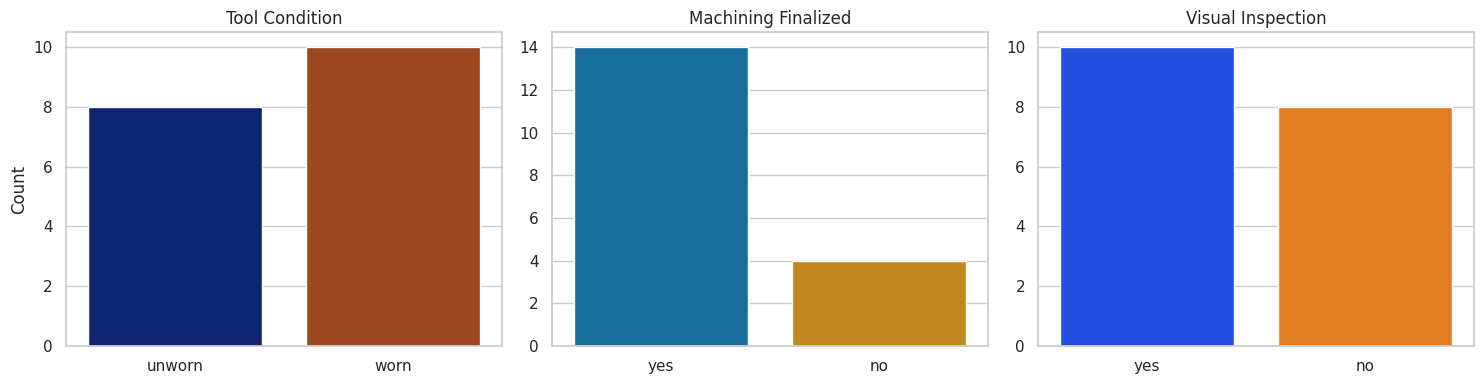

In [ ]:
# Set up the figure
plt.figure(figsize=(15, 4))
sns.set(style="whitegrid")

# Plot 1: tool_condition
plt.subplot(1, 3, 1)
sns.countplot(data=df_result, x='tool_condition', hue = 'tool_condition', palette='dark')
plt.title('Tool Condition')
plt.xlabel('')
plt.ylabel('Count')

# Plot 2: machining_finalized
plt.subplot(1, 3, 2)
sns.countplot(data=df_result, x='machining_finalized', palette='colorblind', hue = 'machining_finalized')
plt.title('Machining Finalized')
plt.xlabel('')
plt.ylabel('')

# Plot 3: passed_visual_inspection
plt.subplot(1, 3, 3)
sns.countplot(data=df_result, x='passed_visual_inspection', palette='bright' , hue = 'passed_visual_inspection')
plt.title('Visual Inspection')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show()

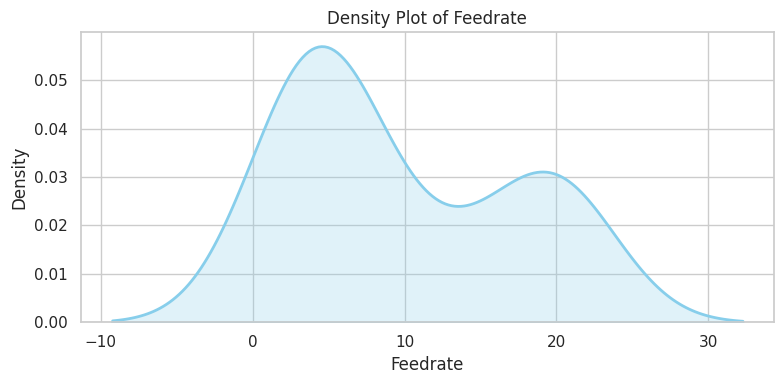

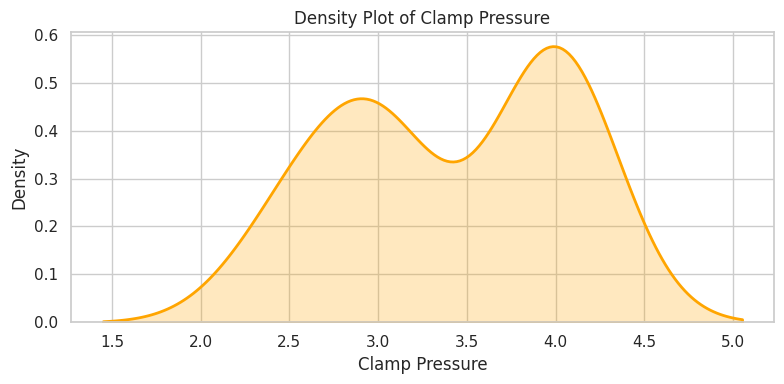

In [ ]:
# Plot 1: Density plot for Feedrate
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_result, x='feedrate', fill=True, color='skyblue', linewidth=2)
plt.title('Density Plot of Feedrate')
plt.xlabel('Feedrate')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Plot 2: Density plot for Clamp Pressure
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df_result, x='clamp_pressure', fill=True, color='orange', linewidth=2)
plt.title('Density Plot of Clamp Pressure')
plt.xlabel('Clamp Pressure')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


## **ii. Bivariate**

In [ ]:
pd.crosstab(df_result['tool_condition'], df_result['passed_visual_inspection'])

passed_visual_inspection,no,yes
tool_condition,,
unworn,2,6
worn,6,4


In [ ]:
pd.crosstab(df_result['tool_condition'], df_result['machining_finalized'])

machining_finalized,no,yes
tool_condition,,
unworn,2,6
worn,2,8


<Axes: xlabel='feedrate', ylabel='Density'>

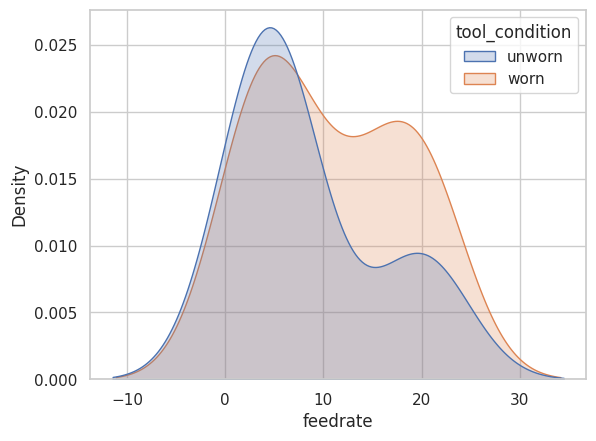

In [ ]:
sns.kdeplot(data=df_result, x='feedrate', hue='tool_condition', fill=True)

<Axes: xlabel='clamp_pressure', ylabel='Density'>

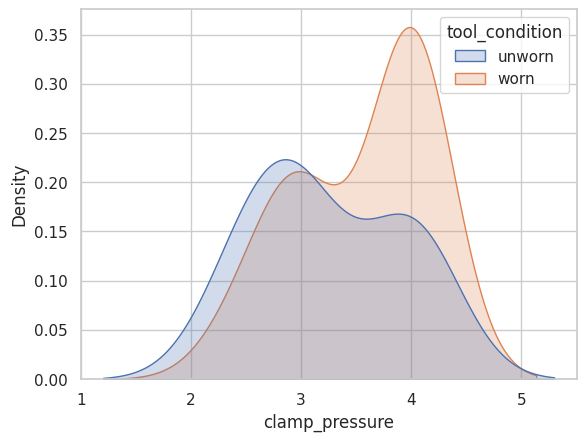

In [ ]:
sns.kdeplot(data=df_result, x='clamp_pressure', hue='tool_condition', fill=True)

## **iii. Multivariate**

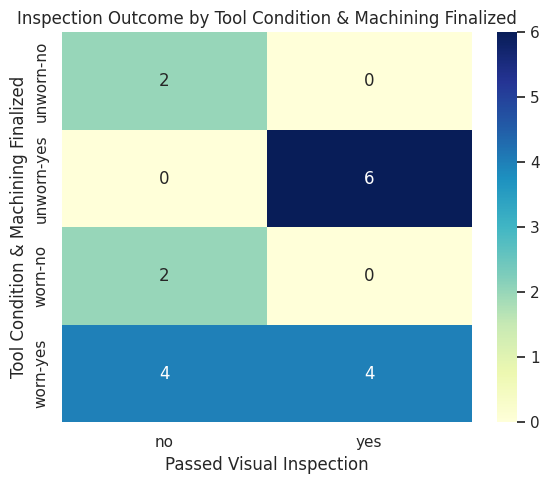

In [ ]:
# Create a crosstab
ct = pd.crosstab(index=[df_result['tool_condition'], df_result['machining_finalized']],
                 columns=df_result['passed_visual_inspection'])

# Plot as heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(ct, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Inspection Outcome by Tool Condition & Machining Finalized')
plt.ylabel('Tool Condition & Machining Finalized')
plt.xlabel('Passed Visual Inspection')
plt.tight_layout()
plt.show()

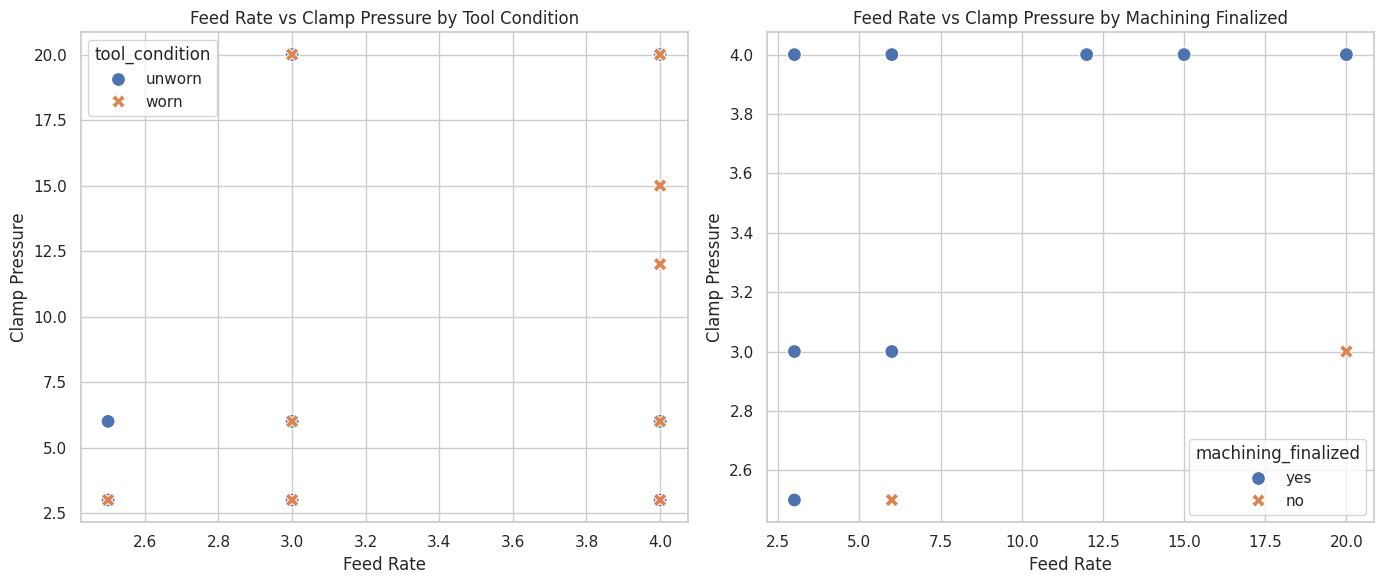

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: colored by tool_condition
sns.scatterplot(data=df_result, x='clamp_pressure', y='feedrate', hue='tool_condition', style='tool_condition', s=100, ax=axs[0])
axs[0].set_title('Feed Rate vs Clamp Pressure by Tool Condition')
axs[0].set_xlabel('Feed Rate')
axs[0].set_ylabel('Clamp Pressure')
axs[0].grid(True)

# Plot 2: colored by machining_finalized
sns.scatterplot(data=df_result, x='feedrate', y='clamp_pressure', hue='machining_finalized', style='machining_finalized', s=100, ax=axs[1])
axs[1].set_title('Feed Rate vs Clamp Pressure by Machining Finalized')
axs[1].set_xlabel('Feed Rate')
axs[1].set_ylabel('Clamp Pressure')
axs[1].grid(True)

plt.tight_layout()
plt.show()